In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import mysql.connector as sql

In [5]:
# loading the dataset
data = pd.read_csv('report_2018-2019.csv')
data.head(20)

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
5,84,Algeria,2018,5.295,0.979,1.154,0.687,0.077,0.055,0.135
6,142,Angola,2018,3.795,0.730,1.125,0.269,0.000,0.079,0.061
7,47,Argentina,2019,6.086,1.092,1.432,0.881,0.471,0.066,0.050
8,29,Argentina,2018,6.388,1.073,1.468,0.744,0.570,0.062,0.054
9,116,Armenia,2019,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [6]:
# checking for null values in the dataset
data.isnull().sum()

Overall rank                    0
Country or region               0
Year                            0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [7]:
data.shape

(312, 10)

# Connecting with mySQL workbench

In [14]:
df = sql.connect(host='localhost', user='root',password='sak123',database='HAPPINESS')
df

In [16]:
mycursor = df.cursor()

In [17]:
from sqlalchemy import create_engine

# Credentials to database connection
hostname="localhost"
dbname="housing"  
uname="root"
pwd="sak123"

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [22]:
# Convert dataframe to sql table                                   
data.to_sql('happiness_level', engine, index=False)

312

In [23]:
engine.execute("USE HAPPINESS")

# Save the DataFrame to a table in MySQL
data.to_sql('report_2018-2019', con=engine, if_exists='replace', index=False)

# Close the database connection
engine.dispose()

# Heat Map

<AxesSubplot:>

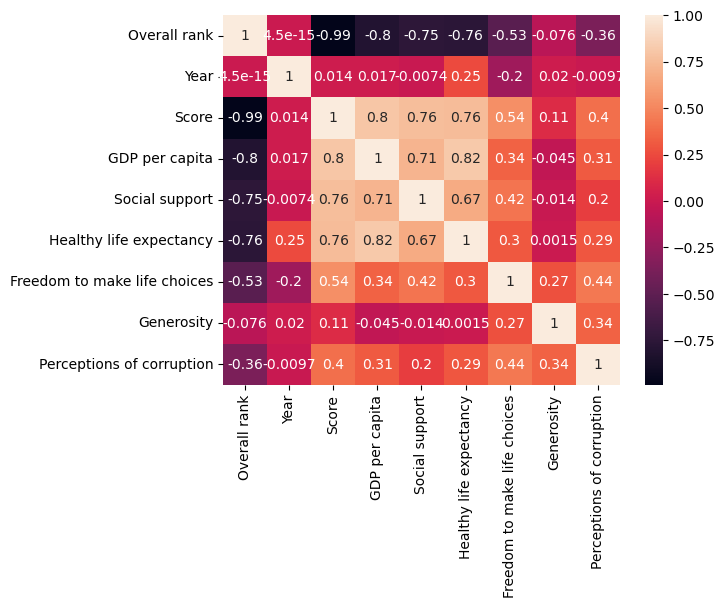

In [10]:
sns.heatmap(data.corr(), annot = True)

# Interpretation :

* The correlation coefficient between "GDP per capita" and "Healthy life expectancy" is 0.86, indicating a strong positive correlation. This suggests that countries with higher GDP per capita tend to have longer healthy life expectancies.


* "GDP per capita" and "Social support" have a correlation coefficient of 0.78, indicating a strong positive correlation. This implies that countries with higher GDP per capita tend to have better social support systems.


* "Healthy life expectancy" and "Social support" exhibit a correlation coefficient of 0.77, indicating a strong positive correlation. This suggests that countries with better social support systems tend to have longer healthy life expectancies.

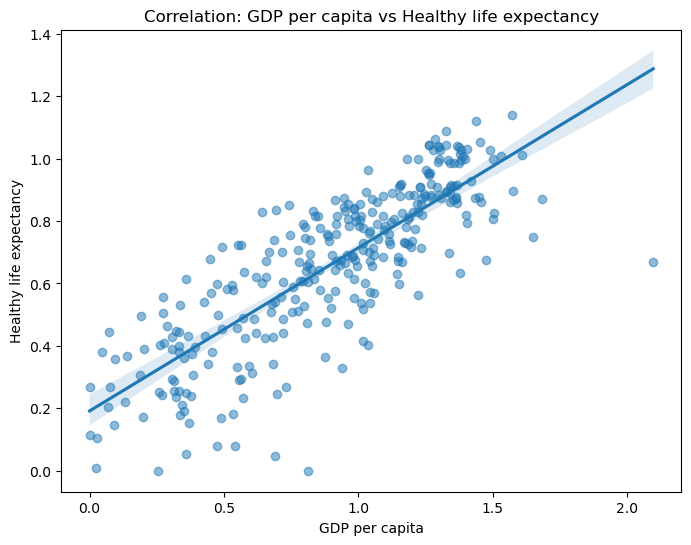

In [11]:
# Scatter plot with trend line for "GDP per capita" and "Healthy life expectancy"
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x="GDP per capita", y="Healthy life expectancy", scatter_kws={"alpha": 0.5})
plt.xlabel("GDP per capita")
plt.ylabel("Healthy life expectancy")
plt.title("Correlation: GDP per capita vs Healthy life expectancy")
plt.show()

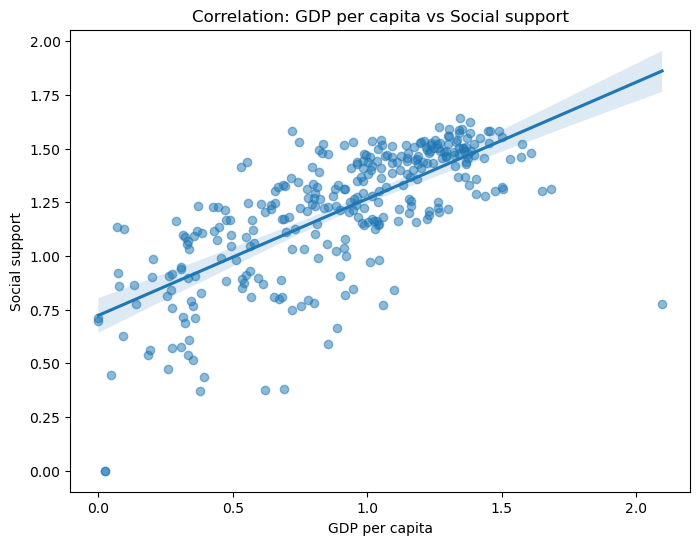

In [9]:
# Scatter plot with trend line for "GDP per capita" and "Social support"
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x="GDP per capita", y="Social support", scatter_kws={"alpha": 0.5})
plt.xlabel("GDP per capita")
plt.ylabel("Social support")
plt.title("Correlation: GDP per capita vs Social support")
plt.show()

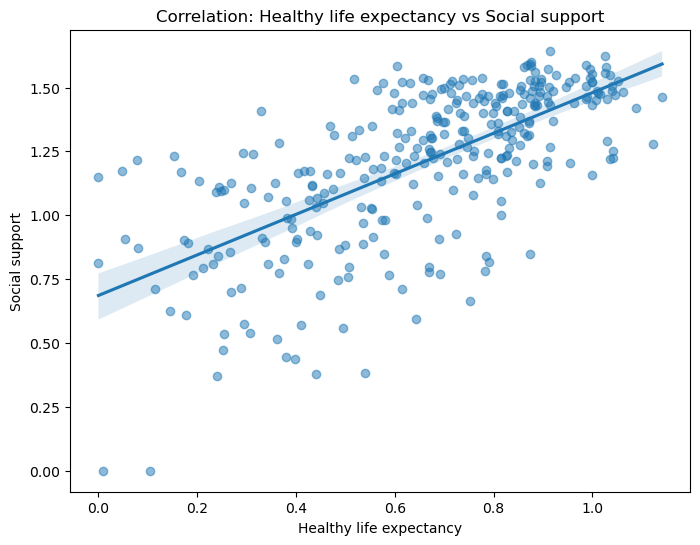

In [10]:
# Scatter plot with trend line for "Healthy life expectancy" and "Social support"
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x="Healthy life expectancy", y="Social support", scatter_kws={"alpha": 0.5})
plt.xlabel("Healthy life expectancy")
plt.ylabel("Social support")
plt.title("Correlation: Healthy life expectancy vs Social support")
plt.show()

# Interpretation : 

The scatter plot and trend line for "GDP per capita" and "Healthy life expectancy" show a positive slope, indicating a positive correlation. As the GDP per capita increases, the healthy life expectancy tends to increase as well. Countries with higher economic prosperity generally have longer life expectancies.

The scatter plot and trend line for "GDP per capita" and "Social support" also show a positive slope, indicating a positive correlation. As the GDP per capita increases, the level of social support tends to increase as well. Higher economic development often enables the implementation of social welfare programs and resources that contribute to stronger social support systems.

The scatter plot and trend line for "Healthy life expectancy" and "Social support" exhibit a positive slope, indicating a positive correlation. As the level of social support increases, the healthy life expectancy tends to increase as well. Countries with better social support systems often provide resources and support that contribute to improved health outcomes.

# Task : Top 10 countries with overall rank for 2018 and 2019 report individually

In [20]:
# Filter the DataFrame for 2018 and sort by overall rank
df_2018 = data[data['Year'] == 2018].sort_values('Overall rank').head(10)
df_2018

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
88,1,Finland,2018,7.632,1.305,1.592,0.874,0.681,0.202,0.393
211,2,Norway,2018,7.594,1.456,1.582,0.861,0.686,0.286,0.340
74,3,Denmark,2018,7.555,1.351,1.590,0.868,0.683,0.284,0.408
115,4,Iceland,2018,7.495,1.343,1.644,0.914,0.677,0.353,0.138
267,5,Switzerland,2018,7.487,1.420,1.549,0.927,0.660,0.256,0.357
198,6,Netherlands,2018,7.441,1.361,1.488,0.878,0.638,0.333,0.295
49,7,Canada,2018,7.328,1.330,1.532,0.896,0.653,0.321,0.291
200,8,New Zealand,2018,7.324,1.268,1.601,0.876,0.669,0.365,0.389
265,9,Sweden,2018,7.314,1.355,1.501,0.913,0.659,0.285,0.383
12,10,Australia,2018,7.272,1.340,1.573,0.910,0.647,0.361,0.302


In [21]:
# Filter the DataFrame for 2019 and sort by overall rank
df_2019 = data[data['Year'] == 2019].sort_values('Overall rank').head(10)
df_2019

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
87,1,Finland,2019,7.769,1.340,1.587,0.986,0.596,0.153,0.393
73,2,Denmark,2019,7.600,1.383,1.573,0.996,0.592,0.252,0.410
210,3,Norway,2019,7.554,1.488,1.582,1.028,0.603,0.271,0.341
114,4,Iceland,2019,7.494,1.380,1.624,1.026,0.591,0.354,0.118
197,5,Netherlands,2019,7.488,1.396,1.522,0.999,0.557,0.322,0.298
266,6,Switzerland,2019,7.480,1.452,1.526,1.052,0.572,0.263,0.343
264,7,Sweden,2019,7.343,1.387,1.487,1.009,0.574,0.267,0.373
199,8,New Zealand,2019,7.307,1.303,1.557,1.026,0.585,0.330,0.380
48,9,Canada,2019,7.278,1.365,1.505,1.039,0.584,0.285,0.308
13,10,Austria,2019,7.246,1.376,1.475,1.016,0.532,0.244,0.226


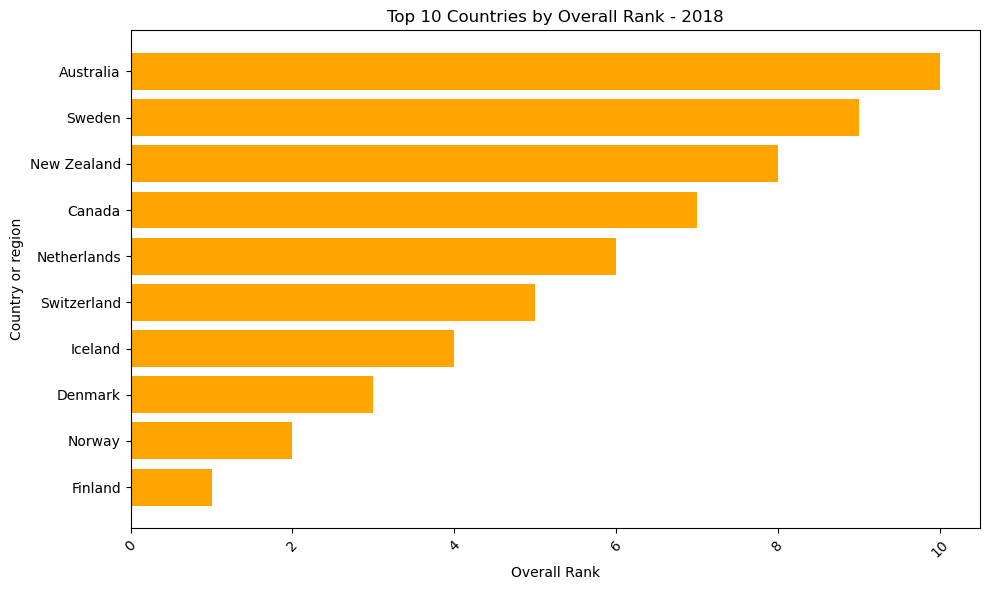

In [46]:
# Create a bar graph for 2018
plt.figure(figsize=(10, 6))
plt.barh(df_2018['Country or region'], df_2018['Overall rank'], color='orange')
plt.xlabel('Overall Rank')
plt.ylabel('Country or region')
plt.title('Top 10 Countries by Overall Rank - 2018')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 countries with their happiness score

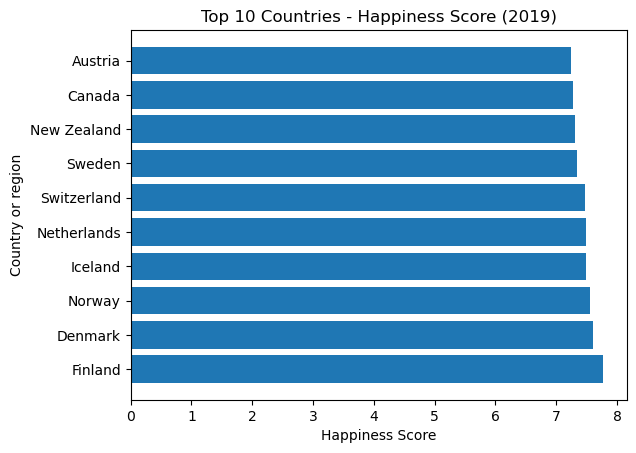

In [44]:
import matplotlib.pyplot as plt

# Extract the necessary data
countries = df_2019['Country or region']
happiness_scores = df_2019['Score']

# Create the bar graph
plt.barh(countries, happiness_scores)

# Set the axis labels and title
plt.xlabel('Happiness Score')
plt.ylabel('Country or region')
plt.title('Top 10 Countries - Happiness Score (2019)')

# Show the plot
plt.show()

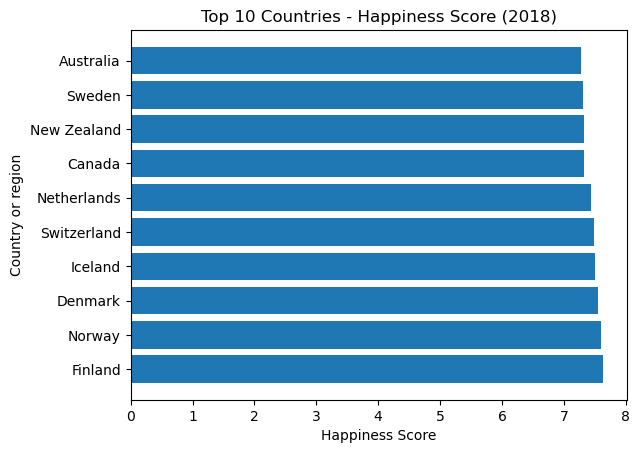

In [48]:
import matplotlib.pyplot as plt

# Extract the necessary data
countries = df_2018['Country or region']
happiness_scores = df_2018['Score']

# Create the bar graph
plt.barh(countries, happiness_scores)

# Set the axis labels and title
plt.xlabel('Happiness Score')
plt.ylabel('Country or region')
plt.title('Top 10 Countries - Happiness Score (2018)')

# Show the plot
plt.show()

# Scatter plot

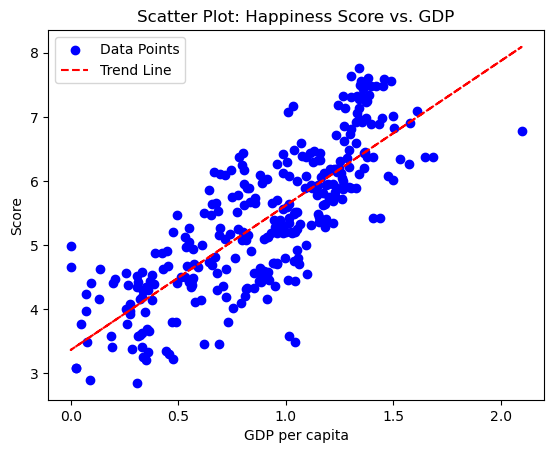

In [39]:
# Extract the columns of interest
happiness_score = data['Score']
gdp = data['GDP per capita']

# Plot the scatter plot with color and legend
plt.scatter(gdp, happiness_score, c='blue', label='Data Points')

# Add a trend line using linear regression
z = np.polyfit(gdp, happiness_score, 1)
p = np.poly1d(z)
plt.plot(gdp, p(gdp), 'r--', label='Trend Line')

# Set the axis labels and title
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.title('Scatter Plot: Happiness Score vs. GDP')

# Add a legend
plt.legend()

# Show the plot
plt.show()


# Interpretation :
* Happiness score increases as the GDP per capita increases.